<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/CursPython/17_Libreria_SciPy_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La libreria SciPy**

SciPy contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales y de imagen, resolución de ODEs y otras tareas para la ciencia e ingeniería.


In [0]:
import scipy
#help(scipy) # si consultamos la ayuda, vemos todos los módulos que posee

## **Constantes físicas**

Incluye bastantes constantes físicas, de uso común, por ejemplo:

In [16]:
from scipy import constants as C
#help(C) # Si quitas @ y ejecutas veras todas las constantes que se incluyen

print(C.c)
print(C.h)

299792458.0
6.62607015e-34


## **Integración numérica**

La documentación de como hacer integrales numéricas se encuentra en:

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

Allí encontraréis, además, ejemplos de los métodos. 

*quad* es la función de integración de propósito general. Vamos a ver como se usa:

In [14]:
from scipy import integrate
from numpy import exp, Inf

def func1(x): # Definimos una función
    return 2.0*exp(-x**2/5.0)

# integración entre -2 y +2
int1, err1 = integrate.quad(func1, -2, +2) # a la función quad se le pasa como argumentos la función a integrar, y los límites de integración. Fijaros que podemos 'capturar
                                           # los valores de la integral y el error, que son dos parámetros que devuelve la función
print(int1,err1)

int2, err2 = integrate.quad(func1, -Inf, +Inf) # Integral entre -Inf y Inf
print(int2,err2)

6.294530963693763 6.988333205108791e-14
7.926654595212022 7.52466850349295e-09


## **Stats**

Las funciones más relevantes de estadística se encuentran en el módulo scipy.stats y se puede obtener una lista bastante completa de estas funciones usando info(stats). La documentación se encuentra aquí:

https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

Vamos a ver como obtener la *pdf* f(x) y la *cdf* F(x) de una distribución normal: 

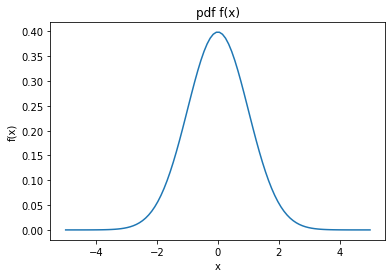

0.05399096651318806


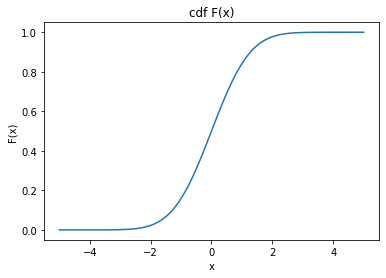

In [102]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Npunts = 100
bins = np.linspace(-5,5,Npunts) # creamos N puntos entre -5 y 5

b = stats.norm.pdf(bins) # Esta función nos retorna la pdf para una distribución normal, normalizada, para el conjunto de puntos que le pasamos.
                         # Recuerda que una dist. normal tiene mu=0 y sigma=1
plt.plot(bins, b)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("pdf f(x)")
plt.show()

# Si queremos saber el valor para un x concreto:
print(stats.norm.pdf(2))

# También podemos hacer una gráfica de la función de densidad cumulativa

Fc = []
for i in bins:
  Fc.append(stats.norm.cdf(i))

plt.plot(bins, Fc)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("cdf F(x)")
plt.show()

Fijaros que con stats podemos obtener valores de multitudes de funciones de densidad de probabilidad, y funciones cumulativas, pero la generación de números aleatorios de acuerdo a una f(x) concreta se hace con *Numpy*. Vamos a ver como generar 10000 números aleatorios de acuerdo a una distribución normal:

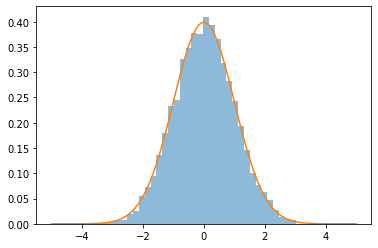

In [69]:
a = np.random.normal(size=10000) # Generamos 10000 puntos aleatorios que sigunen una distribución normal
plt.hist(a, bins=40, density=True, alpha=0.5) # hacemos un histograma normalizado, integral = 1, para comparar con la pdf que hemos obtenido antes
plt.plot(bins, b) # ponemos la pdf de antes encima para ver que exactamente los números siguen esta pdf
plt.show()

SciPy también tiene un método para calcular percentiles, muy útil, sobretodo para construir cdf a partir de una colección de números. Veamos:

-0.026891371896567647
-0.012481174455435088
-0.026891371896567647


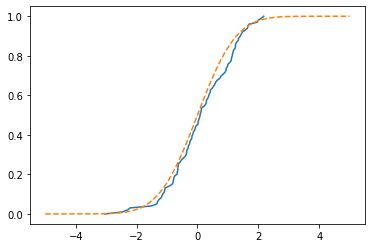

In [98]:
print(stats.scoreatpercentile(a, 50)) # de la colección de datos, nos dice en qué valor tenemos la mitad de los valores a cada lado. Este valor está en la lista de valores
print(np.mean(a)) # El valor medio, no tiene porqué estar en la lista, porque esto es la media aritmética
print(np.median(a)) # Numpy también tiene una función similar a stats.scoreatpercentile(a, 50)

# Pero vamos a ver como construir una cdf:

NPunts = 100
a = np.random.normal(size=NPunts)

x = np.linspace(0.,1., 100)
Fcc = []

for i in x:
  Fcc.append(stats.scoreatpercentile(a, i*100))

plt.plot(Fcc,x)
plt.plot(bins, Fc, '--')
plt.show()

Como obtener la *pdf* y *cdf* de una distribución normal que tiene un valor medio $\mu = 10$ y una $\sigma = 2.3$? Se pueden usar los atributos *loc* y *scale*. Los valores por defecto son *loc = 0* y *scale = 1*. Veamos:

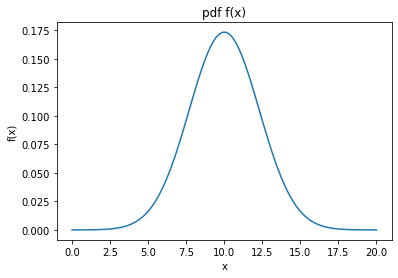

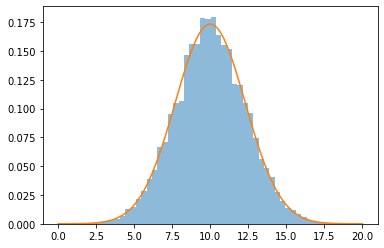

In [110]:
Npunts = 100
bins = np.linspace(0,20,Npunts) # creamos N puntos entre 0 y 20

b = stats.norm.pdf(bins, loc=10, scale=2.3) # Esta función nos retorna la pdf para una distribución normal, con mu=10, sigma=2.3, para el conjunto de puntos que le pasamos.
plt.plot(bins, b)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("pdf f(x)")
plt.show()

# Y como podemos generar números aleatorios que sigan esta distribución no normalizada?

NPunts = 10000
a = np.random.normal(size=NPunts, loc=10, scale=2.3)
plt.hist(a, bins=50, density=True, alpha=0.5) # hacemos un histograma normalizado, integral = 1, para comparar con la pdf que hemos obtenido antes
plt.plot(bins, b) # ponemos la pdf de antes encima para ver que exactamente los números siguen esta pdf
plt.show()